
# Mini-Course Overview -Time Series Data

This  mini-course  is  broken  down  into  7  lessons. 
You  could  complete  one  lesson  per  day(recommended) or complete all of the lessons in one day (hardcore).  It really depends on thetime you have available and your level of enthusiasm.Below are 7 lessons that will get you started and productive with machine learning in Python:

Lesson 01:  Time Series as Supervised Learning.

Lesson 02:  Load Time Series Data.

Lesson 03:  Data Visualization.

Lesson 04:  Persistence Forecast Model.

Lesson 05:  Autoregressive Forecast Model.

Lesson 06:  ARIMA Forecast Model.

Lesson 07:  Hello World End-to-End Project.
# Lesson 01: Time Series as SupervisedLearningTime series problems are different to traditional prediction problems.
The addition of time addsan order to observations that both must be prese
rved and can provide additional informationfor learning algorithms.  A time series dataset may look like the following:

Time, Observation

day1, obs1

day2, obs2

day3, obs3
We can reframe this data as a supervised learning problem with inputs and outputs to bepredicted.  For example:

Input, Output

?,     obs1

obs1,  obs2

obs2,  obs3

obs3,  ?
You can see that the reframing means we have to discard some rows with missing data.Once it is reframed, we can then apply all of our favorite learning algorithms likek-NearestNeighbors and Random Forest.  For more help, see the post:
# Lesson 02: Load Time Series Data
Get used to exploring loaded time series data in Python:
1.  Print the first few rows using thehead()function.
2.  Print the dimensions of the dataset using the size attribute.
3.  Query the dataset using a date-time string.
4.  Print summary statistics of the observations

In [40]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('C:/Users/rzouga/Downloads/Github/TimeSeriesData/Birth.csv', sep=',', usecols=[0],engine='python')
dataset.head()

,DateBirth
0,"""1959-01-01"",35"
1,"""1959-01-02"",32"
2,"""1959-01-03"",30"
3,"""1959-01-04"",31"
4,"""1959-01-05"",44"


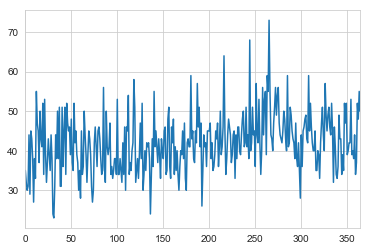

In [41]:
dataset['birth'] = dataset.DateBirth.apply(lambda x: int(x[13:15]))
series=dataset.loc[:,'birth']
series.plot()


In [42]:
# Number of Observations
series.shape

(365,)

# Descriptive Statistics

In [43]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: birth, dtype: float64

# Lesson 03: Data Visualization
Time Series Visualization

Visualization plays an important role in time series analysis and forecasting.

Plots of the raw sample data can provide valuable diagnostics to identify temporal structures like trends, cycles, and seasonality that can influence the choice of model.

A problem is that many novices in the field of time series forecasting stop with line plots.

In this tutorial, we will take a look at 6 different types of visualizations that you can use on your own time series data. They are:

    Line Plots.
    Histograms and Density Plots.
    Box and Whisker Plots.
    Heat Maps.
    Lag Plots or Scatter Plots.
    Autocorrelation Plots.
https://s3.amazonaws.com/MLMastery/time_series_forecasting_with_python_mini_course.pdf?__s=iviz5p3xyyuc8jaeegr9

The focus is on univariate time series, but the techniques are just as applicable to multivariate time series, when you have more than one observation at each time step.

Next, let’s take a look at the dataset we will use to demonstrate time series visualization in this tutorial.
# Minimum Daily Temperatures Dataset

This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3,650 observations. The source of the data is credited as the Australian Bureau of Meteorolog

In [44]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('C:/Users/rzouga/Downloads/Github/TimeSeriesData/MinTemp.csv')
print(series.head())

            DateTemp
0  "1981-01-01",20.7
1  "1981-01-02",17.9
2  "1981-01-03",18.8
3  "1981-01-04",14.6
4  "1981-01-05",15.8


In [45]:
from datetime import date
series['Date'] = series.DateTemp.apply(lambda x: date(int(x[1:5]),int(x[6:8]), int(x[9:11])))
series['Temp'] = series.DateTemp.apply(lambda x: float(x[13:175]))
series.head()

,DateTemp,Date,Temp
0,"""1981-01-01"",20.7",1981-01-01,20.7
1,"""1981-01-02"",17.9",1981-01-02,17.9
2,"""1981-01-03"",18.8",1981-01-03,18.8
3,"""1981-01-04"",14.6",1981-01-04,14.6
4,"""1981-01-05"",15.8",1981-01-05,15.8


In [46]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 3 columns):
DateTemp    3650 non-null object
Date        3650 non-null object
Temp        3650 non-null float64
dtypes: float64(1), object(2)
memory usage: 85.6+ KB


# 1. Time Series Line Plot

The first, and perhaps most popular, visualization for time series is the line plot.

In this plot, time is shown on the x-axis with observation values along the y-axis.

Below is an example of visualizing the Pandas Series of the Minimum Daily Temperatures dataset directly as a line plot.

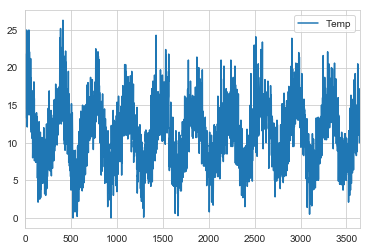

In [47]:
from pandas import read_csv
from matplotlib import pyplot

series.plot()
pyplot.show()

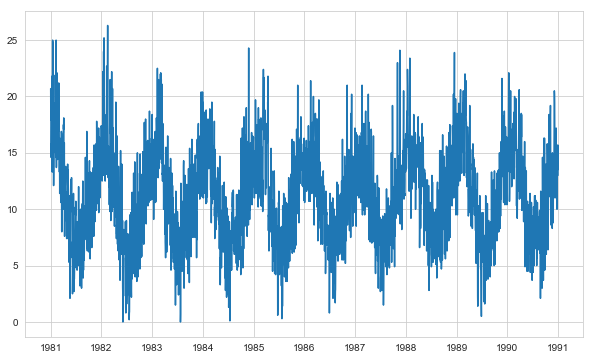

In [48]:
# Import pyplot
import matplotlib.pyplot as plt
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.plot(series['Date'], 
        series['Temp'])
plt.show()

The line plot is quite dense.

Sometimes it can help to change the style of the line plot; for example, to use a dashed line or dots.

Below is an example of changing the style of the line to be black dots instead of a connected line (the style=’k.’ argument).

We could change this example to use a dashed line by setting style to be ‘k–‘.

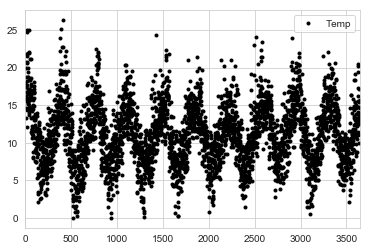

In [49]:
series.plot(style='k.')
pyplot.show()



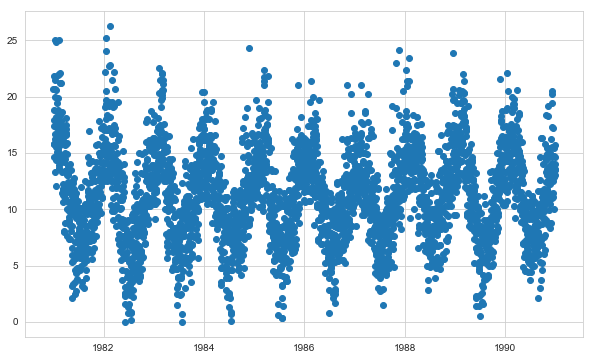

In [50]:
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot
ax.scatter(series['Date'], 
        series['Temp'])

plt.show()

In [51]:
import pandas as pd 
# df['ArrivalDate']=pd.to_datetime(df['ArrivalDate'], format='%Y-%m-%d')
series['year'] = pd.DatetimeIndex(series['Date']).year
series['month'] = pd.DatetimeIndex(series['Date']).month
series['Day'] = pd.DatetimeIndex(series['Date']).day
series.head()

,DateTemp,Date,Temp,year,month,Day
0,"""1981-01-01"",20.7",1981-01-01,20.7,1981,1,1
1,"""1981-01-02"",17.9",1981-01-02,17.9,1981,1,2
2,"""1981-01-03"",18.8",1981-01-03,18.8,1981,1,3
3,"""1981-01-04"",14.6",1981-01-04,14.6,1981,1,4
4,"""1981-01-05"",15.8",1981-01-05,15.8,1981,1,5


In [52]:

from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
groups = series.groupby(series['year']).agg(['sum', 'mean', 'max'])
groups 

Temp                     year             month                 Day  \
         sum       mean   max     sum  mean   max   sum      mean max   sum   
year                                                                          
1981  4203.8  11.517260  25.0  723065  1981  1981  2382  6.526027  12  5738   
1982  3936.0  10.783562  26.3  723430  1982  1982  2382  6.526027  12  5738   
1983  4083.4  11.187397  22.5  723795  1983  1983  2382  6.526027  12  5738   
1984  3866.0  10.591781  24.3  724160  1984  1984  2372  6.498630  12  5736   
1985  4065.2  11.137534  22.4  724525  1985  1985  2382  6.526027  12  5738   
1986  3943.2  10.803288  21.4  724890  1986  1986  2382  6.526027  12  5738   
1987  3961.4  10.853151  24.1  725255  1987  1987  2382  6.526027  12  5738   
1988  4369.8  11.972055  23.9  725620  1988  1988  2372  6.498630  12  5736   
1989  4110.6  11.261918  22.0  725985  1989  1989  2382  6.526027  12  5738   
1990  4259.4  11.669589  22.1  726350  1990  1990  2382  6.526027  12  5738   

                     
           mean max  
year                 
1981  15.720548  31  
1982  15.720548  31  
1983  15.720548  31  
1984  15.715068  31  
1985  15.720548  31  
1986  15.720548  31  
1987  15.720548  31  
1988  15.715068  31  
1989  15.720548  31  
1990  15.720548  31

year
1981    AxesSubplot(0.125,0.125;0.775x0.755)
1982    AxesSubplot(0.125,0.125;0.775x0.755)
1983    AxesSubplot(0.125,0.125;0.775x0.755)
1984    AxesSubplot(0.125,0.125;0.775x0.755)
1985    AxesSubplot(0.125,0.125;0.775x0.755)
1986    AxesSubplot(0.125,0.125;0.775x0.755)
1987    AxesSubplot(0.125,0.125;0.775x0.755)
1988    AxesSubplot(0.125,0.125;0.775x0.755)
1989    AxesSubplot(0.125,0.125;0.775x0.755)
1990    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Temp, dtype: object

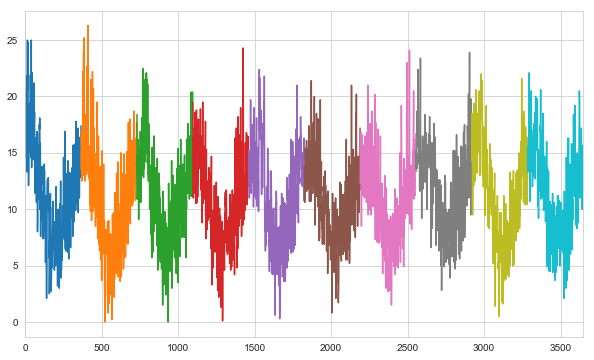

In [53]:
series.groupby(series['year']).Temp.plot(figsize=(10, 6))

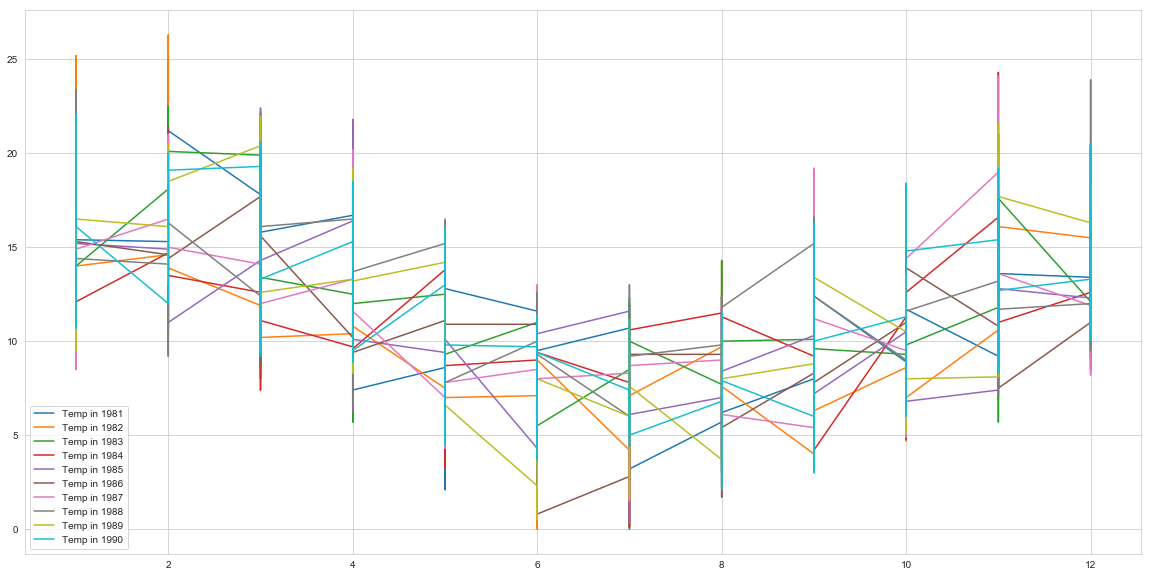

In [54]:
fig,ax= plt.subplots(figsize=(20, 10))
for key, grp in series.groupby(series['year']): 
    ax.plot(grp['month'], grp['Temp'], label = "Temp in {0:02d}".format(key))
plt.legend(loc='best')    
plt.show()

# 2. Time Series Histogram and Density Plots

Another important visualization is of the distribution of observations themselves.

This means a plot of the values without the temporal ordering.

Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution). This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.

The example below creates a histogram plot of the observations in the Minimum Daily Temperatures dataset. A histogram groups values into bins, and the frequency or count of observations in each bin can provide insight into the underlying distribution of the observations.

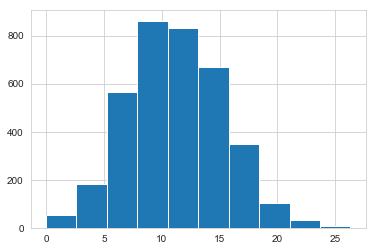

In [55]:
series.Temp.hist()

We can get a better idea of the shape of the distribution of observations by using a density plot.

This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution.

Below is an example of a density plot of the Minimum Daily Temperatures dataset.

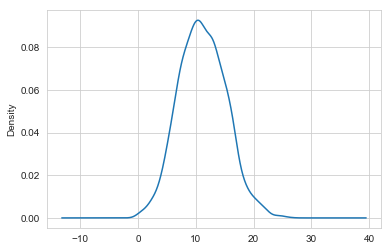

In [56]:
series.Temp.plot(kind='kde')
pyplot.show()

# 3. Time Series Box and Whisker Plots by Interval

Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval.

Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

Box and whisker plots can be created and compared for each interval in a time series, such as years, months, or days.

Below is an example of grouping the Minimum Daily Temperatures dataset by years, as was done above in the plot example. A box and whisker plot is then created for each year and lined up side-by-side for direct comparison

1981         AxesSubplot(0.1,0.736957;0.235294x0.163043)
1982    AxesSubplot(0.382353,0.736957;0.235294x0.163043)
1983    AxesSubplot(0.664706,0.736957;0.235294x0.163043)
1984         AxesSubplot(0.1,0.541304;0.235294x0.163043)
1985    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
1986    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
1987         AxesSubplot(0.1,0.345652;0.235294x0.163043)
1988    AxesSubplot(0.382353,0.345652;0.235294x0.163043)
1989    AxesSubplot(0.664706,0.345652;0.235294x0.163043)
1990             AxesSubplot(0.1,0.15;0.235294x0.163043)
dtype: object

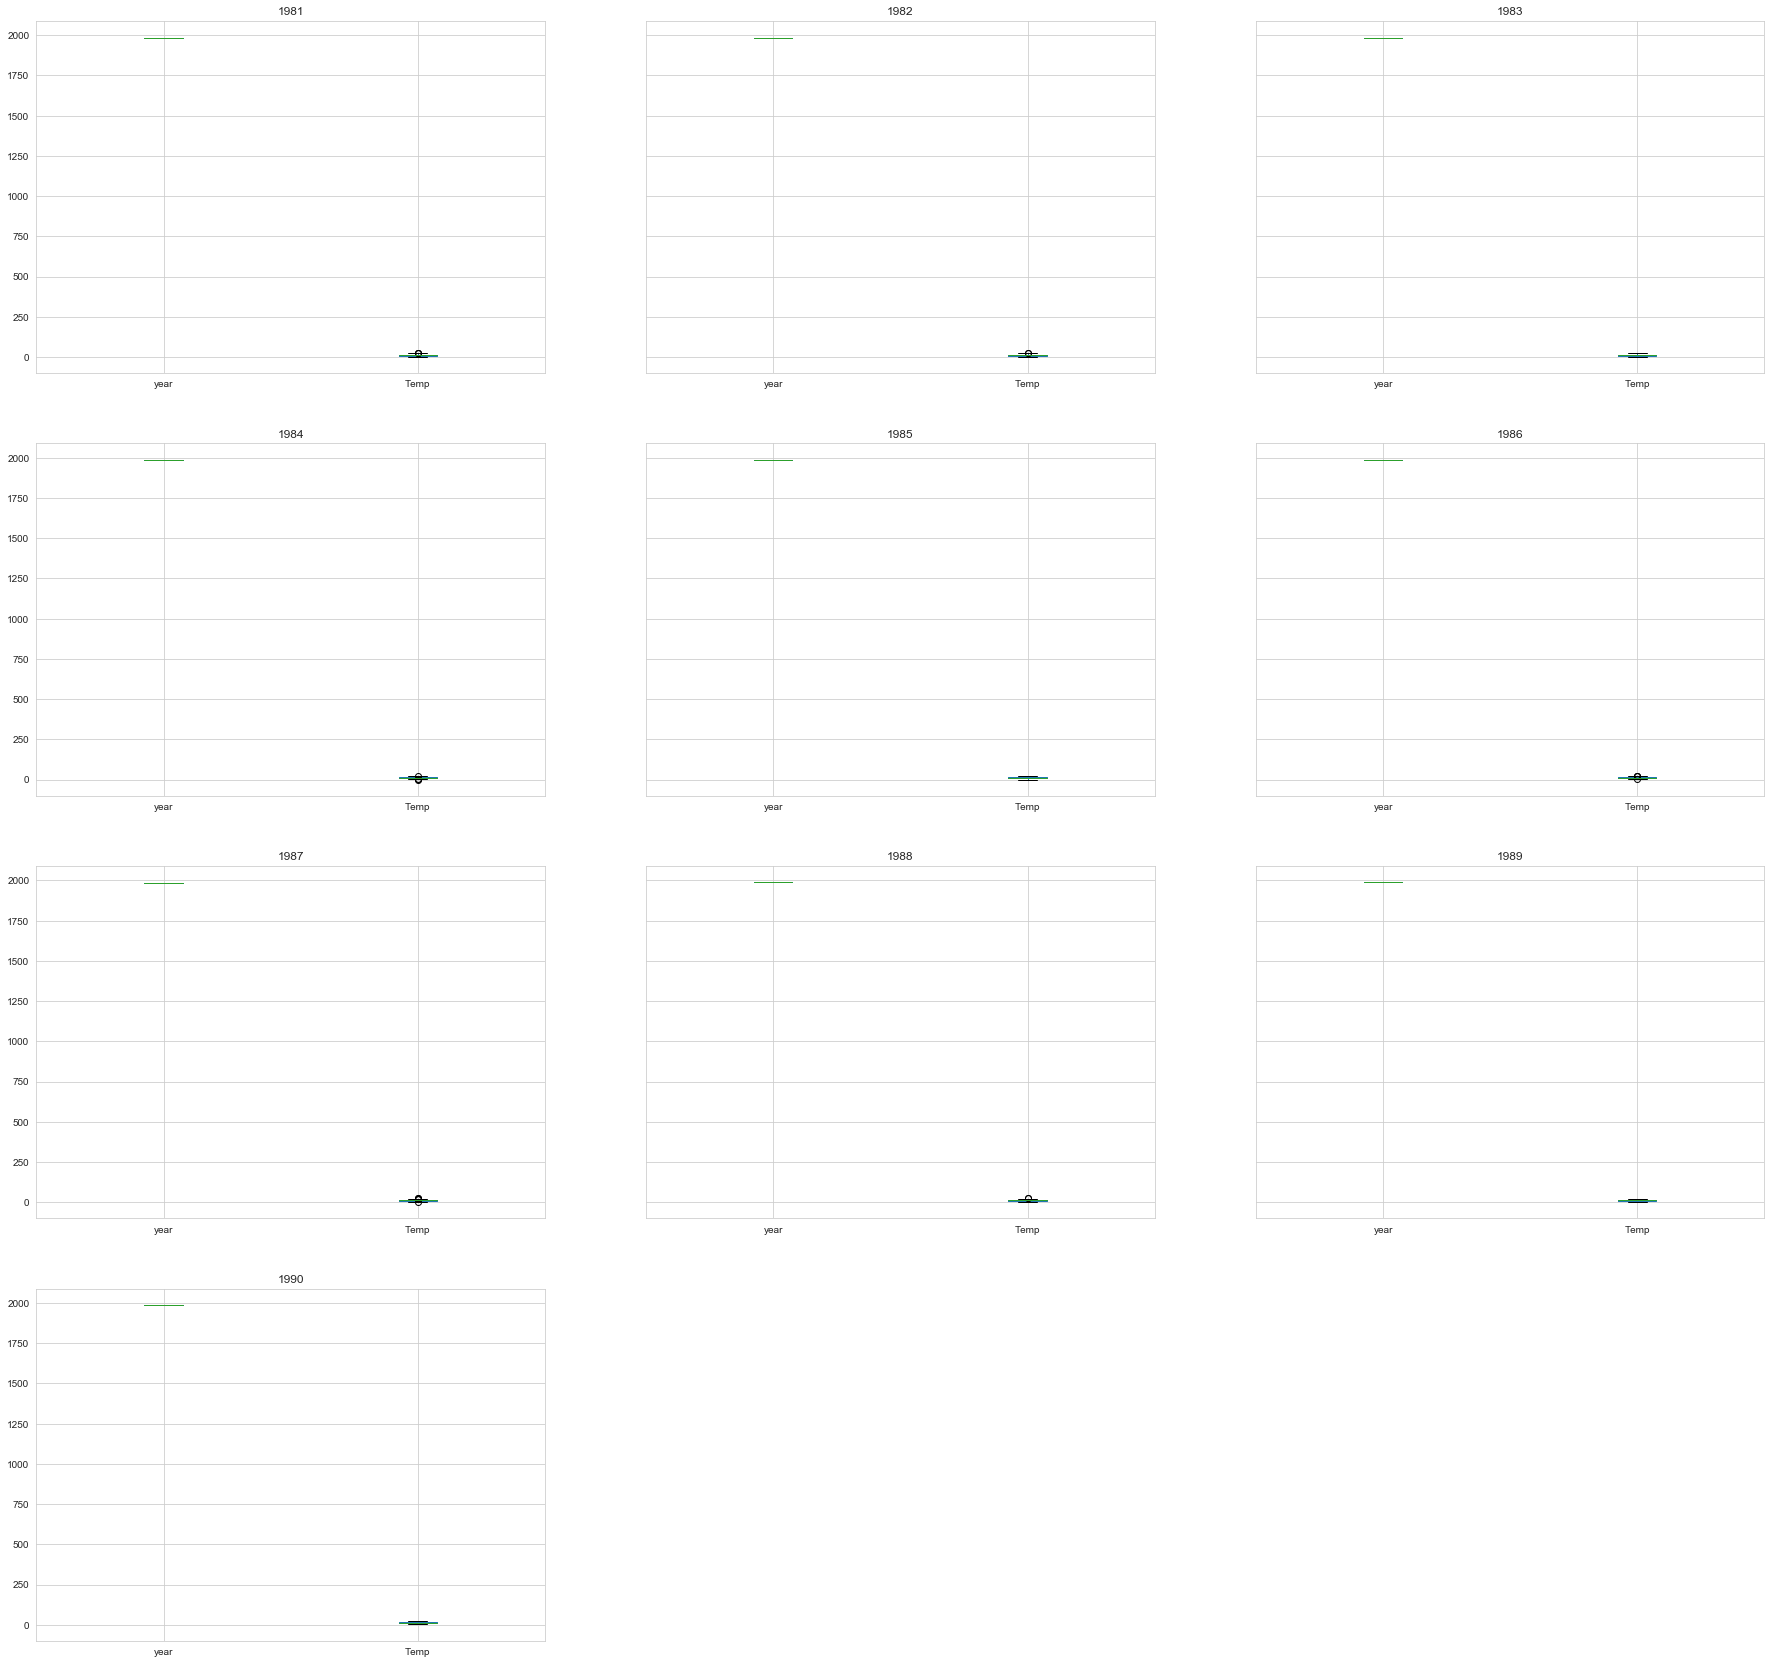

In [57]:
series1=series.loc[:,['year','Temp']]
series1.groupby(series.year).boxplot(figsize=(30, 30))
   

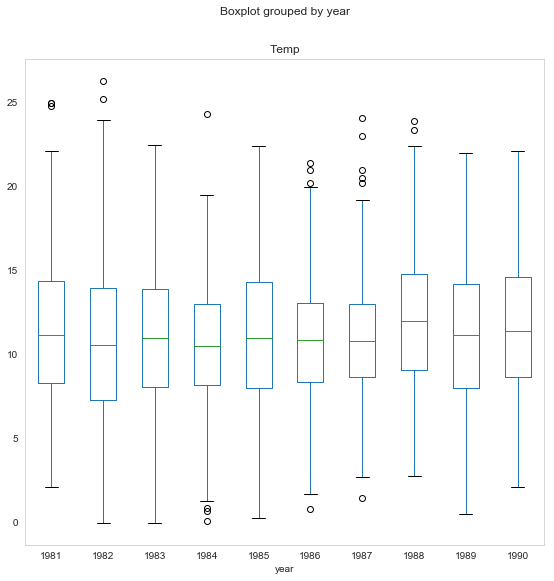

In [58]:

series.boxplot(by ='year', column =['Temp'], grid = False,  figsize=(9,9)) 


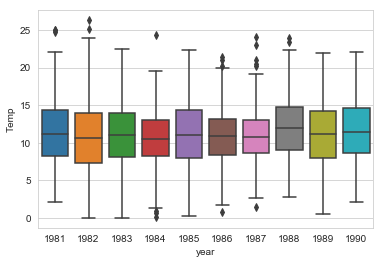

In [67]:
import seaborn as sns 
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'year', y = 'Temp', data = series) 

In [109]:
series.head(2)

,DateTemp,Date,Temp,year,month,Day
0,"""1981-01-01"",20.7",1981-01-01,20.7,1981,1,1
1,"""1981-01-02"",17.9",1981-01-02,17.9,1981,1,2


In [110]:
series2=series[series.year==1990]
series2.head(2)

,DateTemp,Date,Temp,year,month,Day
3285,"""1990-01-01"",14.8",1990-01-01,14.8,1990,1,1
3286,"""1990-01-02"",13.3",1990-01-02,13.3,1990,1,2


Running the example creates 12 box and whisker plots, showing the significant change in distribution of minimum temperatures across the months of the year from the Southern Hemisphere summer in January to the Southern Hemisphere winter in the middle of the year, and back to summer again.

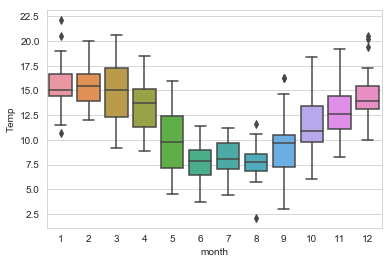

In [111]:
import seaborn as sns 
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'month', y = 'Temp', data = series2) 

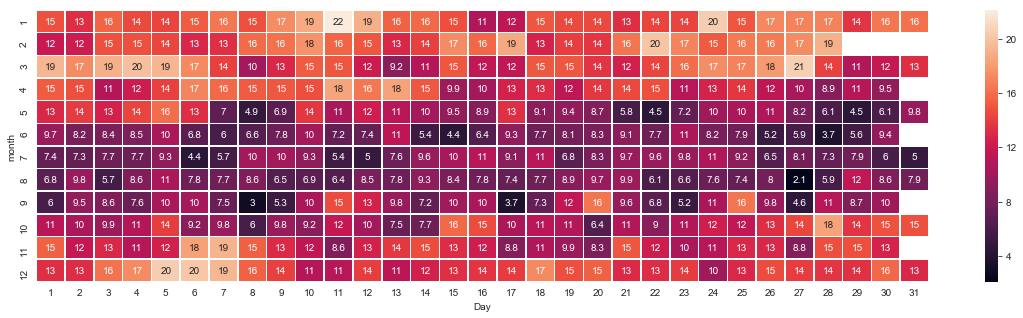

In [112]:
plt.figure(figsize=(20,5))

series2= series2.pivot("month", "Day", "Temp")

ax = sns.heatmap(series2, annot=True,linewidths=.5)

# 5. Time Series Lag Scatter Plots

Time series modeling assumes a relationship between an observation and the previous observation.

Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag2, and so on.

A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot.

Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

    If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
    If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
    Either relationship is good as they can be modeled.

More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.

A ball in the middle or a spread across the plot suggests a weak or no relationship.

Below is an example of a lag plot for the Minimum Daily Temperatures dataset.

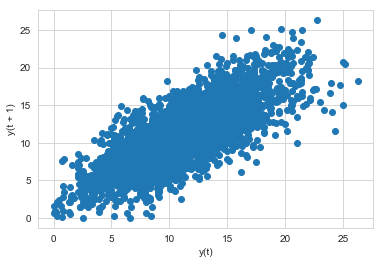

In [117]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
series3=series.loc[:,'Temp']
lag_plot(series3)
pyplot.show()

The plot created from running the example shows a relatively strong positive correlation between observations and their lag1 values.

We can repeat this process for an observation and any lag values. Perhaps with the observation at the same time last week, last month, or last year, or any other domain-specific knowledge we may wish to explore.

For example, we can create a scatter plot for the observation with each value in the previous seven days. Below is an example of this for the Minimum Daily Temperatures dataset.

First, a new DataFrame is created with the lag values as new columns. The columns are named appropriately. Then a new subplot is created that plots each observation with a different lag value

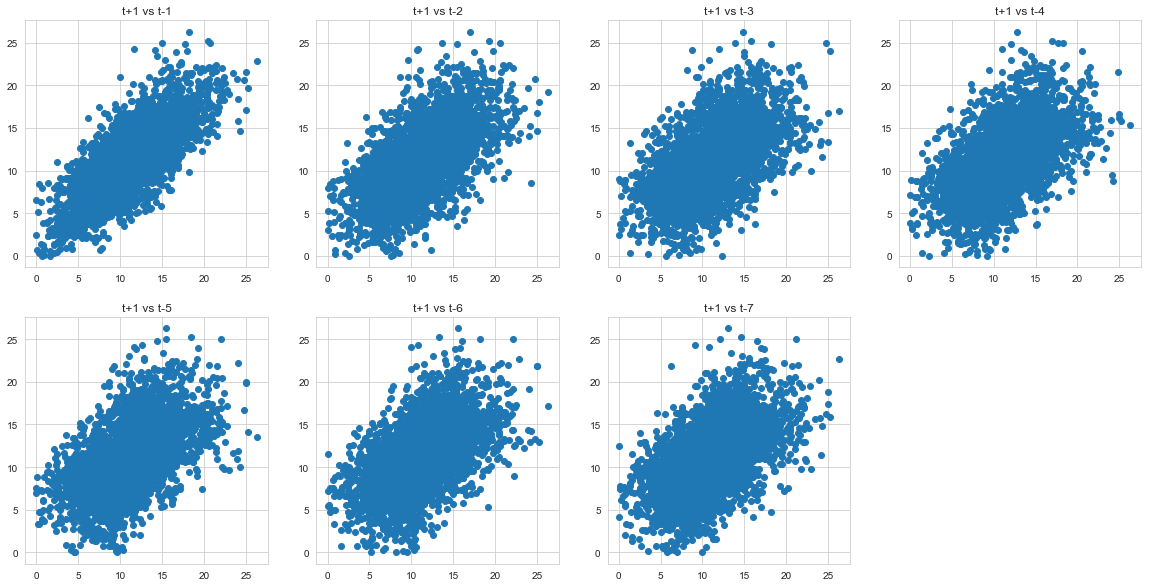

In [120]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
plt.figure(figsize=(20,10))
values = DataFrame(series3.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

# 6. Time Series Autocorrelation Plots

We can quantify the strength and type of relationship between observations and their lags.

In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation).

A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag.

This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation_plot() function.

The example below creates an autocorrelation plot for the Minimum Daily Temperatures dataset

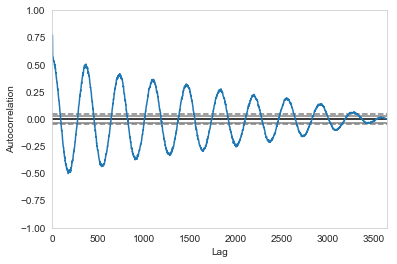

In [121]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series3)
pyplot.show()

The statsmodels library also provides a version of the plot in the plot_acf() function as a line plot.

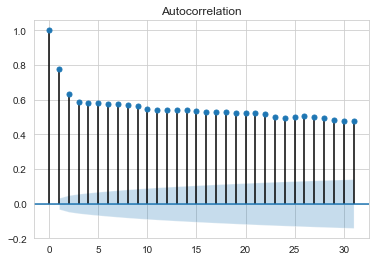

In [125]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series3, lags=31)
pyplot.show()

# Lesson 04: Persistence Forecast Model
It is important to establish a baseline forecast.  The simplest forecast you can make is to use thecurrent observation (t) to predict the observation at the next time step (t+1).  This is calledthe naive forecast or the persistence forecast and may be the best possible model on some timeseries forecast problems.  In this lesson, you will make a persistence forecast for a standard timeseries forecast problem.Download the daily female births dataset in CSV format and save it with the filenamedaily-births.csv

    t-1   t+1
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8
Test MSE: 6.827


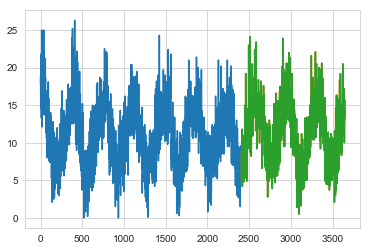

In [123]:
from sklearn.metrics import mean_squared_error
# Create lagged dataset
values = DataFrame(series3.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))
 
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
 
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

# Lesson 05: Autoregressive ForecastModel
Autoregression means developing a linear model that uses observations at previous time steps topredict observations at future time step (automeans self in ancient Greek).  Autoregression is aquick and powerful time series forecasting method.  The Statsmodels Python library providesthe autoregression model in the AR class1.  In this lesson, you will develop an autoregressiveforecast model for a standard time series dataset

Lag: 29
Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test MSE: 1.502


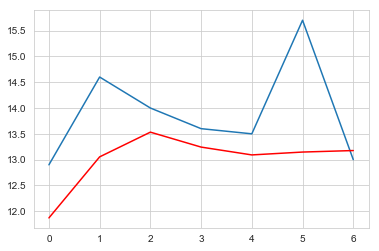

In [127]:
from statsmodels.tsa.ar_model import AR
# split dataset
X = series3.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# Lesson 06: ARIMA Forecast Model
The ARIMA is a classical linear model for time series forecasting.  It combines the autoregressivemodel (AR), differencing to remove trends and seasonality, called integrated (I) and the movingaverage model (MA) which is an old name given to a model that forecasts the error, used tocorrect predictions.  The Statsmodels Python library provides the ARIMA class2.  In this lesson,you will develop an ARIMA model for a standard time series dataset.

# Autoregressive Integrated Moving Average Model

An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

    AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
    I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
    MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

    p: The number of lag observations included in the model, also called the lag order.
    d: The number of times that the raw observations are differenced, also called the degree of differencing.
    q: The size of the moving average window, also called the order of moving average.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.

Next, let’s take a look at how we can use the ARIMA model in Python. We will start with loading a simple univariate time series.

                             ARIMA Model Results                              
Dep. Variable:                 D.Temp   No. Observations:                 3649
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8495.810
Method:                       css-mle   S.D. of innovations              2.482
Date:                Mon, 16 Mar 2020   AIC                          17005.620
Time:                        20:51:53   BIC                          17049.036
Sample:                             1   HQIC                         17021.082
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0013      0.017     -0.076      0.940      -0.035       0.033
ar.L1.D.Temp    -0.3358      0.016    -20.469      0.000      -0.368      -0.304
ar.L2.D.Temp    -0.3911      0.017    -23.03

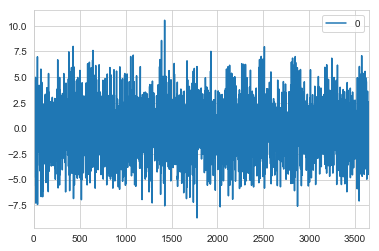

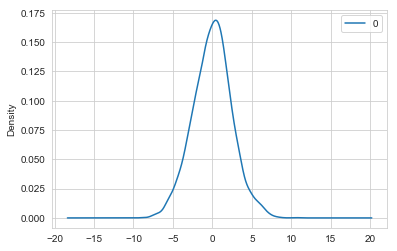

                 0
count  3649.000000
mean     -0.001054
std       2.482981
min      -8.731152
25%      -1.637912
50%       0.063772
75%       1.562933
max      10.547800


In [128]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series3, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

C:\Users\rzouga\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 5.707


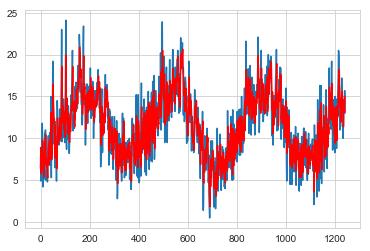

In [130]:
X = series3.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()